In [2]:
# Import the required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Load the Dataset
df = pd.read_csv("creditcard.csv")

In [4]:
# Explore the Data
print("Dataset Info:")
print(df.info())
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print("\n Class Distribution:")
print(df['Class'].value_counts())


 Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\anshu\AppData\Local\Temp\ipykernel_27280\327133141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


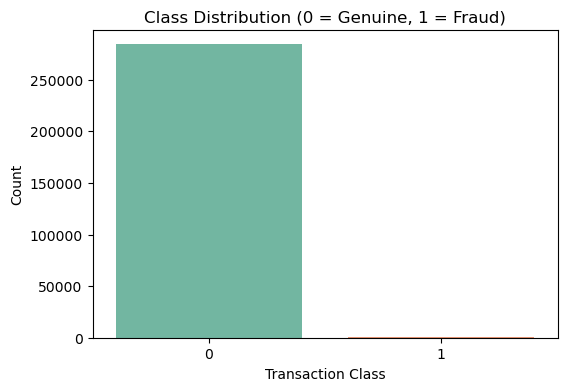

In [7]:
# Visualize Class Imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution (0 = Genuine, 1 = Fraud)')
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

In [8]:
# Feature Scaling
scaler = StandardScaler()
df['scaled_Amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_Time'] = scaler.fit_transform(df[['Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
# Prepare Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
# Balance Dataset with Undersampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42).reset_index(drop=True)
X_bal = df_balanced.drop('Class', axis=1)
y_bal = df_balanced['Class']

C:\Users\anshu\AppData\Local\Temp\ipykernel_27280\2822469993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_bal, palette='Set1')


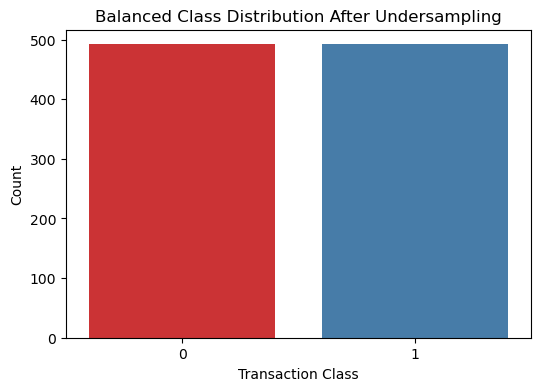

In [11]:
# Visualize Balanced Data
plt.figure(figsize=(6, 4))
sns.countplot(x=y_bal, palette='Set1')
plt.title("Balanced Class Distribution After Undersampling")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)

In [13]:
# Train Models
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [14]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name} Evaluation")
    print("-" * 30)
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [16]:
# Evaluate Both Models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


 Logistic Regression Evaluation
------------------------------
Confusion Matrix:
[[129   5]
 [ 14 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.97      0.91      0.94       162

    accuracy                           0.94       296
   macro avg       0.93      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296


 Random Forest Evaluation
------------------------------
Confusion Matrix:
[[129   5]
 [ 15 147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.97      0.91      0.94       162

    accuracy                           0.93       296
   macro avg       0.93      0.94      0.93       296
weighted avg       0.93      0.93      0.93       296



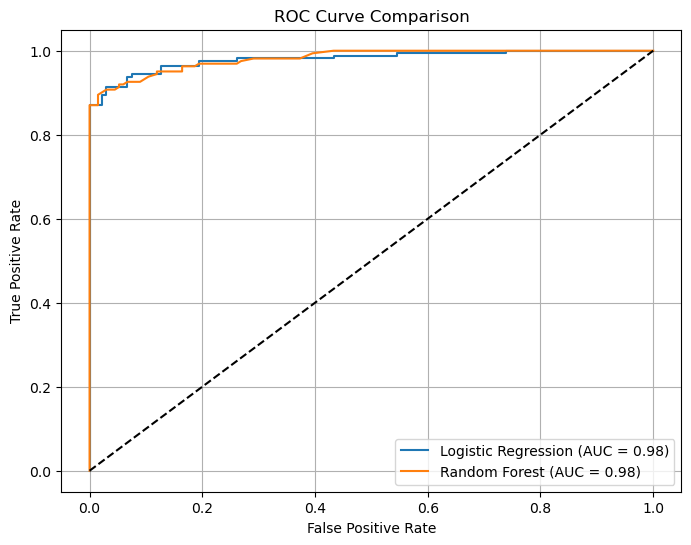

In [17]:
# ROC Curve
def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.figure(figsize=(8, 6))
plot_roc(lr, X_test, y_test, "Logistic Regression")
plot_roc(rf, X_test, y_test, "Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()